In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt


import time
import os  

In [3]:
os.getcwd()

In [6]:
df = pd.read_csv("all_jobs_concat_data_raw.csv")
print(df.shape)

(6125, 13)


In [7]:
df.head()

,salary_min_label,salary_max_label,salary_unit_label,job_title,job_company,job_occupation,job_location,job_id,job_wfh_option,job_description,job_addnl_info,query_position,query_state
0,$80k,$90k,Per Year,Senior Financial Data Analyst,(Not Available),Occupation: Computer and Mathematical Occupations,"Edgerton, OH - 43517",Work At Home option: No,jo_1610300432,Senior Financial Data Analyst\nABOUT THE COMPA...,NaN,Data Analyst,Ohio
1,NaN,$75k - $104k,Per year,Data Analyst,Freestore Foodbank,Occupation: Business Intelligence Analysts,"Cincinnati, OH - 45202",Location/Work Site Industry (NAICS): Confide...,65be3d783,Job Description\n· Develop and implement data ...,NaN,Data Analyst,Ohio
2,NaN,$75k - $104k,Per year,Data Analyst,Better Business Bureau,Occupation: Business Intelligence Analysts,"Cincinnati, OH - 45233",Location/Work Site Industry (NAICS): Confide...,319febc5,Job Description\nCareer Opportunity: Data Anal...,NaN,Data Analyst,Ohio
3,NaN,$75k - $103k,Per year,Data Analyst/ Data Entry Specialist,Techlink Systems,Occupation: Business Intelligence Analysts,"Dublin, OH - 43016",Location/Work Site Industry (NAICS): Confide...,8f80bbe2,Job Description\nJob Title: Data Analyst/ Data...,NaN,Data Analyst,Ohio
4,NaN,$78k - $120k,Per year,Business Analyst Data Analyst,BCforward,Occupation: Computer Systems Analysts,"Columbus, OH - 43240",Location/Work Site Industry (NAICS): Confide...,bf4bf0113,Job Description\nJob Title: Project Manager Ad...,NaN,Data Analyst,Ohio


In [8]:
#Only include Data Analyst Job Titles.
df = df[df['job_title'].str.contains("data|analyst|Data|Analyst")]
print(df.shape)

(5359, 13)


In [13]:
df["job_title"].value_counts(normalize=True)*100

Data Analyst                                                                                            15.823848
Senior Data Analyst                                                                                      3.974622
Data Developer, Reporting                                                                                1.642097
Business Data Analyst                                                                                    1.567457
Sr. Data Analyst                                                                                         0.802389
Data Analyst II                                                                                          0.783728
Master Data Analyst                                                                                      0.709088
Research Data Analyst                                                                                    0.615787
Healthcare Data Analyst                                                                 

In [24]:
df_job_titles = pd.concat([pd.DataFrame(df["job_title"].value_counts()),
                           df["job_title"].value_counts(normalize=True)*100],axis=1)
df_job_titles.columns = ["Count","Percentage"]
df_job_titles.head(10)

,Count,Percentage
Data Analyst,848,15.823848
Senior Data Analyst,213,3.974622
"Data Developer, Reporting",88,1.642097
Business Data Analyst,84,1.567457
Sr. Data Analyst,43,0.802389
Data Analyst II,42,0.783728
Master Data Analyst,38,0.709088
Research Data Analyst,33,0.615787
Healthcare Data Analyst,33,0.615787
Financial Data Analyst,29,0.541146


In [25]:
df_job_titles = pd.concat([pd.DataFrame(df["query_state"].value_counts()),
                           df["query_state"].value_counts(normalize=True)*100],axis=1)
df_job_titles.columns = ["Count","Percentage"]
df_job_titles.head(10)

,Count,Percentage
California,596,11.121478
Texas,546,10.188468
Virginia,483,9.012876
New York,479,8.938235
Florida,404,7.538720
Pennsylvania,354,6.605710
Georgia,304,5.672700
Massachusetts,276,5.150215
New Jersey,229,4.273185
Maryland,224,4.179884


In [29]:
df_job_titles = pd.concat([pd.DataFrame(df["job_occupation"].value_counts()),
                           df["job_occupation"].value_counts(normalize=True)*100],axis=1)
df_job_titles.columns = ["Count","Percentage"]
df_job_titles.head(10)

,Count,Percentage
Occupation: Business Intelligence Analysts,1756,45.752996
Occupation: Computer and Mathematical Occupations,1386,36.112559
Occupation: Computer Programmers,102,2.657634
Occupation: Computer Systems Analysts,97,2.527358
"Occupation: Captains, Mates, and Pilots of Water Vessels",45,1.172486
Occupation: Health Information Technologists and Medical Registrars,42,1.094320
Occupation: Operations Research Analysts,39,1.016154
Occupation: Clinical Data Managers,32,0.833768
Occupation: Architecture and Engineering Occupations,29,0.755602
Occupation: Management Occupations,28,0.729547


## Top Skills For Data Analysts

In [30]:
#Create a new field that combines job description and job additional info
df['job_addnl_info'] = df['job_addnl_info'].fillna('')
df["job_desc_additional_info_concat"] = df['job_description'] + " " + df['job_addnl_info']

### Approach 1 : Tokenization

In [31]:
#Get stopwords from nltk
from nltk.corpus import stopwords
stop_words_eng = stopwords.words('english')
stop_words_eng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string

In [44]:
#Remove Punctutaion -> Replace New Line -> Split text into individual words and flatten -> Remove Stopwords
import string 

split_words_list = [str(row).lower().translate(str.maketrans('', '', string.punctuation)).replace("\n"," ").split(" ") for row in df["job_desc_additional_info_concat"]] 
flattened_split_words_list = [item for sublist in split_words_list for item in sublist]

#Remove Stopwords and words/characters with length = 1
word_list_without_stop_words = [word for word in flattened_split_words_list if word not in stop_words_eng and len(word) > 1]

In [45]:
#Count Occurence of Each Word
from collections import Counter

counter_counts = Counter(word_list_without_stop_words)
print(" Most Frequent Words")
counter_counts.most_common()

 Most Frequent Words


[('data', 58592),
 ('experience', 20213),
 ('business', 16162),
 ('work', 12864),
 ('analysis', 10419),
 ('skills', 9988),
 ('management', 9717),
 ('team', 9037),
 ('analyst', 8434),
 ('support', 8027),
 ('ability', 7599),
 ('years', 7506),
 ('information', 7359),
 ('analytics', 7041),
 ('including', 6816),
 ('reporting', 6429),
 ('required', 5979),
 ('knowledge', 5963),
 ('reports', 5933),
 ('requirements', 5791),
 ('systems', 5733),
 ('related', 5707),
 ('position', 5462),
 ('development', 5378),
 ('degree', 5374),
 ('working', 5234),
 ('health', 5211),
 ('tools', 5208),
 ('quality', 4979),
 ('new', 4789),
 ('provide', 4665),
 ('job', 4636),
 ('strong', 4580),
 ('sql', 4577),
 ('solutions', 4525),
 ('technical', 4207),
 ('using', 4033),
 ('research', 3999),
 ('process', 3950),
 ('develop', 3935),
 ('processes', 3846),
 ('role', 3735),
 ('analytical', 3603),
 ('project', 3571),
 ('within', 3553),
 ('ensure', 3539),
 ('andor', 3479),
 ('performance', 3388),
 ('system', 3374),
 ('projec

In [46]:
#Get COunt for SKill from Dictionary above
print("sql: "+ str(counter_counts['sql']))
print("python: "+ str(counter_counts['python']))
print("tableau: "+ str(counter_counts['tableau']))

sql: 4577
python: 1551
tableau: 2000


### Approach 2 : Keyword Search

In [172]:

import re

def get_skill_count(skill):
    if type(skill)== str:
        return(sum([1 for text in df['job_desc_additional_info_concat'] if re.search(r'\b' + skill + r'\b', str(text).lower()) != None]))
    else:
        skills_concat = '|'.join(skill)
        return(sum([1 for text in df['job_desc_additional_info_concat'] if re.search(r'\b' + skills_concat + r'\b', str(text).lower()) != None]))

In [176]:
#List of Skills
skill_list = ['sql','python','r','tableau',['excel','office'],'power bi','sas','ms access',
            ['aws',"amazon web services"],'salesforce','snowflake',['google cloud','gcp'],'azure','java','cloud',
            'javascript','qlikview','oracle']
skill_count = [get_skill_count(skill) for skill in skill_list]

In [177]:
#Create Dataframe
skill_df = pd.DataFrame({'skill':skill_list,'occurence_count':skill_count})
skill_df['pct_of_jobs'] = skill_df['occurence_count'] *100 /df.shape[0]

skill_df = skill_df.sort_values(by=['occurence_count'],ascending=False).reset_index(drop=True)
skill_df

,skill,occurence_count,pct_of_jobs
0,"[excel, office]",3710,69.229334
1,sql,2764,51.576787
2,tableau,1560,29.109909
3,python,1327,24.762082
4,r,1149,21.440567
5,power bi,1050,19.593208
6,sas,640,11.942527
7,cloud,571,10.654973
8,oracle,400,7.464079
9,azure,352,6.568390


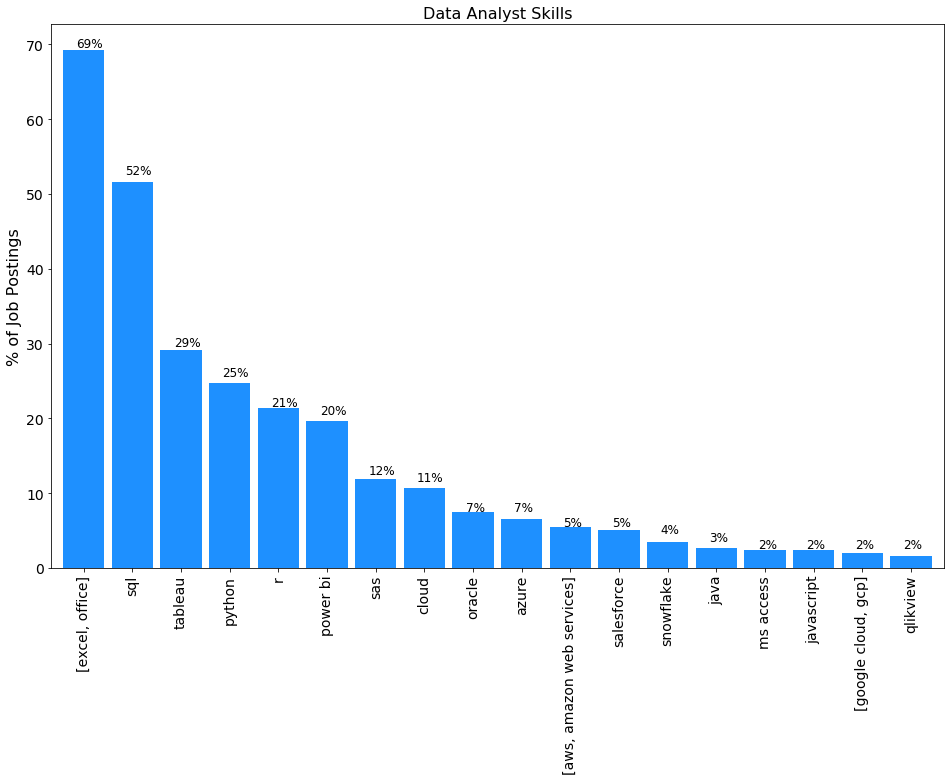

In [296]:
ax = skill_df.plot(x='skill', y='pct_of_jobs', kind='bar', color='dodgerblue', figsize=(16, 10), width=.85)

# Add data labels to the bars
for i, v in enumerate(round(skill_df['pct_of_jobs'],0)):
    ax.text(i - 0.15, v + 0.60, str(int(v)) + '%', color='black',fontsize=12)

    
plt.title('Data Analyst Skills', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.ylabel('% of Job Postings', fontsize = 16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
##plt.xticks(rotation=30)


plt.legend().remove()

plt.savefig("top_skills.png", bbox_inches='tight')

# Show the chart
plt.show()


## Top Skill Combinations


In [200]:
from itertools import combinations
skill_combination_list = ['excel','sql','tableau','python','r']

possible_combinations_list = sum([list(map(list, combinations(skill_combination_list, i))) for i in range(len(skill_combination_list) + 1)], [])
possible_combinations_list = possible_combinations_list[1::]

In [227]:
#Two Skill Combinations
possible_combinations_list[5:15]

[['excel', 'sql'],
 ['excel', 'tableau'],
 ['excel', 'python'],
 ['excel', 'r'],
 ['sql', 'tableau'],
 ['sql', 'python'],
 ['sql', 'r'],
 ['tableau', 'python'],
 ['tableau', 'r'],
 ['python', 'r']]

In [245]:
#Get Two Skill Combination Count
def get_two_skill_combo_count(skills_list):
        return(sum([1 for text in df['job_desc_additional_info_concat'] if ((re.search(r'\b' + skills_list[0] + r'\b', str(text).lower()) != None) & (re.search(r'\b' + skills_list[1] + r'\b', str(text).lower()) != None))]))

In [278]:
combination_counts = [get_two_skill_combo_count(li) for li in possible_combinations_list[5:15]]

In [279]:
skill_combo_df = pd.DataFrame({'skill_combo':possible_combinations_list[5:15],'combo_occurence_counts':combination_counts})
skill_combo_df['pct_of_jobs'] = skill_combo_df['combo_occurence_counts'] *100 /df.shape[0]

In [280]:
skill_combo_df = skill_combo_df.sort_values(by=['combo_occurence_counts'],ascending=False).reset_index(drop=True)
skill_combo_df

,skill_combo,combo_occurence_counts,pct_of_jobs
0,"[sql, tableau]",1203,22.448218
1,"[excel, sql]",1194,22.280276
2,"[sql, python]",1078,20.115693
3,"[sql, r]",859,16.029110
4,"[python, r]",809,15.096100
5,"[excel, tableau]",677,12.632954
6,"[tableau, python]",677,12.632954
7,"[tableau, r]",613,11.438701
8,"[excel, python]",499,9.311439
9,"[excel, r]",425,7.930584


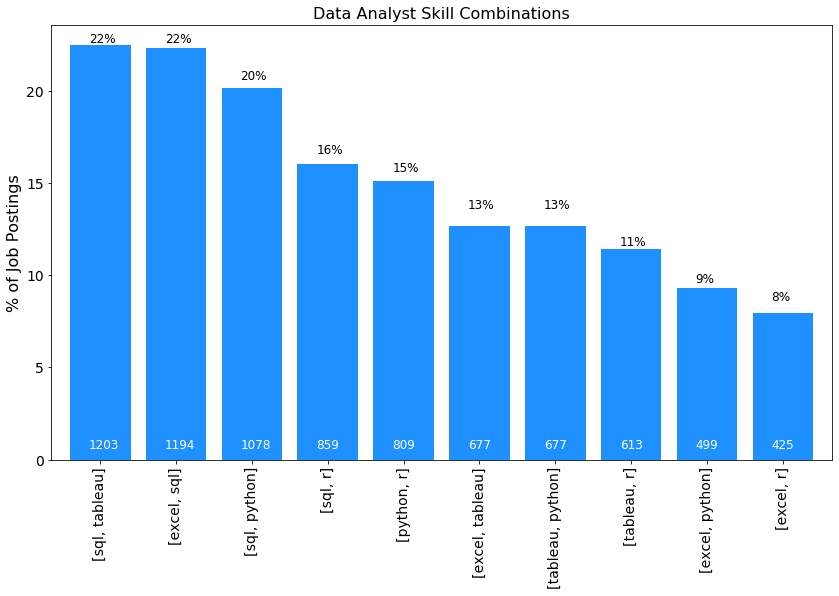

In [288]:
ax = skill_combo_df.plot(x='skill_combo', y='pct_of_jobs', kind='bar', color='dodgerblue', figsize=(14, 8), width=.8)

# Add data labels to the bars
for i, v in enumerate(round(skill_combo_df['pct_of_jobs'],0)):
    ax.text(i - 0.15, v + 0.60, str(int(v)) + '%', color='black',fontsize=12)

for i, v, z in zip(range(0,10),round(skill_combo_df['pct_of_jobs']),skill_combo_df['combo_occurence_counts']):
    ax.text(i - 0.15, .6, str(int(z)), color='white',fontsize=12)

plt.title('Data Analyst Skill Combinations', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.ylabel('% of Job Postings', fontsize = 16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
##plt.xticks(rotation=30)


plt.legend().remove()

#Save plot to file
plt.savefig("two_skill_combo.png",bbox_inches="tight")

# Show the chart
plt.show()

In [242]:
#Three Skill Combinations
possible_combinations_list[15:25]

[['excel', 'sql', 'tableau'],
 ['excel', 'sql', 'python'],
 ['excel', 'sql', 'r'],
 ['excel', 'tableau', 'python'],
 ['excel', 'tableau', 'r'],
 ['excel', 'python', 'r'],
 ['sql', 'tableau', 'python'],
 ['sql', 'tableau', 'r'],
 ['sql', 'python', 'r'],
 ['tableau', 'python', 'r']]

In [289]:
#Get Two Skill Combination Count
def get_three_skill_combo_count(skills_list):
        return(sum([1 for text in df['job_desc_additional_info_concat'] if ((re.search(r'\b' + skills_list[0] + r'\b', str(text).lower()) != None) & (re.search(r'\b' + skills_list[1] + r'\b', str(text).lower()) != None) & (re.search(r'\b' + skills_list[2] + r'\b', str(text).lower()) != None))]))

In [290]:
combination_counts = [get_three_skill_combo_count(li) for li in possible_combinations_list[15:25]]

In [291]:
skill_combo_df = pd.DataFrame({'skill_combo':possible_combinations_list[15:25],'combo_occurence_counts':combination_counts})
skill_combo_df['pct_of_jobs'] = skill_combo_df['combo_occurence_counts'] *100 /df.shape[0]

In [292]:
skill_combo_df = skill_combo_df.sort_values(by=['combo_occurence_counts'],ascending=False).reset_index(drop=True)
skill_combo_df

,skill_combo,combo_occurence_counts,pct_of_jobs
0,"[sql, python, r]",663,12.371711
1,"[sql, tableau, python]",604,11.270759
2,"[sql, tableau, r]",527,9.833924
3,"[excel, sql, tableau]",488,9.106177
4,"[tableau, python, r]",453,8.453070
5,"[excel, sql, python]",426,7.949244
6,"[excel, sql, r]",338,6.307147
7,"[excel, python, r]",317,5.915283
8,"[excel, tableau, python]",263,4.907632
9,"[excel, tableau, r]",205,3.825341


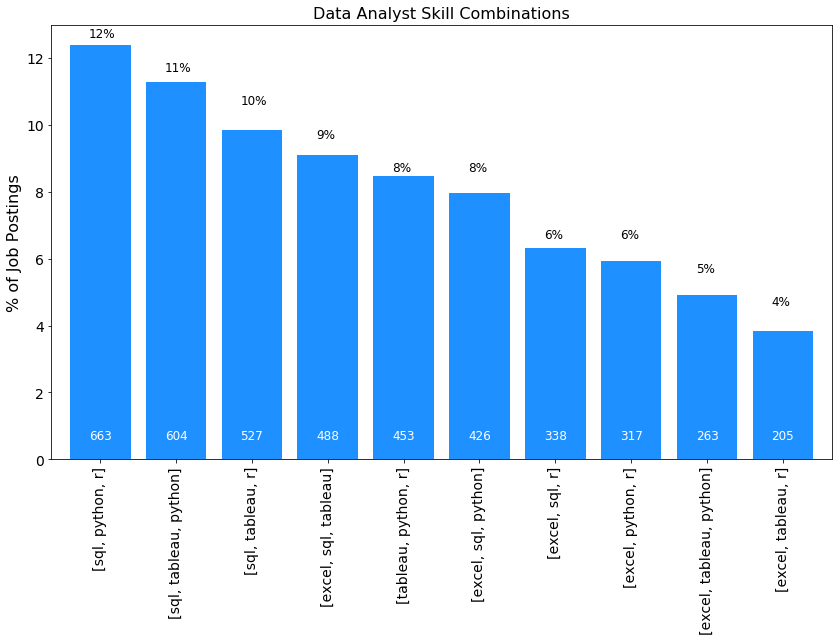

In [293]:
ax = skill_combo_df.plot(x='skill_combo', y='pct_of_jobs', kind='bar', color='dodgerblue', figsize=(14, 8), width=.8)

# Add data labels to the bars
for i, v in enumerate(round(skill_combo_df['pct_of_jobs'],0)):
    ax.text(i - 0.15, v + 0.60, str(int(v)) + '%', color='black',fontsize=12)
    
for i, v, z in zip(range(0,10),round(skill_combo_df['pct_of_jobs']),skill_combo_df['combo_occurence_counts']):
    ax.text(i - 0.15, .6, str(int(z)), color='white',fontsize=12)

plt.title('Data Analyst Skill Combinations', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.ylabel('% of Job Postings', fontsize = 16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
##plt.xticks(rotation=30)


plt.legend().remove()


plt.savefig("three_skill_combo.png",bbox_inches="tight")

# Show the chart
plt.show()


## Data Analyst Salary Analysis


In [299]:
df["salary_unit_label"].value_counts()

Per year     2868
Per Year      912
Per Hour      340
Per Month      39
Per Week        2
Name: salary_unit_label, dtype: int64

In [308]:
#3780 Jobs with Per Year Salaries
df_per_year = df[df["salary_unit_label"].str.lower() == "per year"]
df_per_year.shape

(3780, 14)

In [381]:
#Clean Up Salary Columns to get Min and Max Salary for each job
min_sal_list = [max_sal[0].strip().replace("$","").replace("k","") if len(max_sal) > 1 else str(min_sal).replace("$","").replace("k","") for min_sal,max_sal in zip(df_per_year["salary_min_label"],df_per_year["salary_max_label"].str.split("-"))]
max_sal_list = [sal[1].strip().replace("$","").replace("k","") if len(sal) > 1 else sal[0].strip().replace("$","").replace("k","") for sal in df_per_year["salary_max_label"].str.split("-")]

In [386]:
df_per_year["min_sal_clean"] = min_sal_list
df_per_year["max_sal_clean"] = max_sal_list

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [420]:
df_per_year["min_sal_clean"] = df_per_year["min_sal_clean"].replace('nan','0').astype(int)
df_per_year["max_sal_clean"] = df_per_year["max_sal_clean"].replace('nan','0').astype(int)

/Users/praneeth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/praneeth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [437]:
df_per_year["mean_sal"] = [(min_sal + max_sal)/2 if min_sal !=0 else max_sal for min_sal,max_sal in zip(df_per_year["min_sal_clean"],df_per_year["max_sal_clean"])]

/Users/praneeth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
df_per_year_remove_outliers = df_per_year[df_per_year["mean_sal"] >=30]
df_per_year_remove_outliers.shape

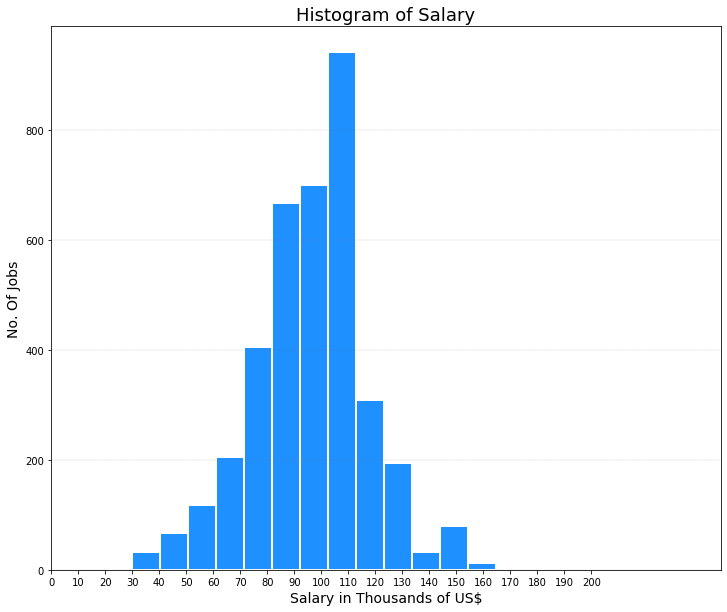

In [498]:
from scipy.stats import norm

df_per_year_remove_outliers["mean_sal"].hist(bins=20,grid=False,figsize=(12, 10), color='dodgerblue',
                                            edgecolor='white', linewidth=2)

plt.xticks(np.arange(0,210,10),fontsize = 10)
plt.grid(axis='y',linewidth=.2,linestyle='--',color="grey")



plt.xlabel('Salary in Thousands of US$', fontsize=14)
plt.ylabel('No. Of Jobs', fontsize=14)

# set the font size of the title
plt.title('Histogram of Salary', fontsize=18)

plt.savefig("salary_host.png",bbox_inches='tight')

# display the plot
plt.show()

In [485]:
#Median Salary 
np.median(df_per_year_remove_outliers["mean_sal"])

96.5

In [494]:
df_per_year_remove_outliers["mean_sal"].describe()

count    3773.000000
mean       95.887888
std        21.569446
min        30.000000
25%        82.500000
50%        96.500000
75%       106.000000
max       237.500000
Name: mean_sal, dtype: float64

In [ ]:
df_per_year_remove_outliers["mean_sal"]
df['binned'] = pd.cut(df['percentage'], bins)

In [515]:
bins = np.arange(0,210,40)
sal_range_df = pd.DataFrame(pd.cut(df_per_year_remove_outliers["mean_sal"],bins).value_counts(sort=False))
sal_range_df.columns = ['No. of Jobs']
sal_range_df['pct_of_jobs'] = round(sal_range_df['No. of Jobs'] *100 /sal_range_df['No. of Jobs'].sum(),2)
sal_range_df

,No. of Jobs,pct_of_jobs
"(0, 40]",32,0.85
"(40, 80]",678,17.98
"(80, 120]",2699,71.59
"(120, 160]",352,9.34
"(160, 200]",9,0.24


In [517]:
bins = np.arange(0,210,20)
sal_range_df = pd.DataFrame(pd.cut(df_per_year_remove_outliers["mean_sal"],bins).value_counts(sort=False))
sal_range_df.columns = ['No. of Jobs']
sal_range_df['% of Jobs'] = round(sal_range_df['No. of Jobs'] *100 /sal_range_df['No. of Jobs'].sum(),2)
sal_range_df

,No. of Jobs,% of Jobs
"(0, 20]",0,0.00
"(20, 40]",32,0.85
"(40, 60]",173,4.59
"(60, 80]",505,13.40
"(80, 100]",1344,35.65
"(100, 120]",1355,35.94
"(120, 140]",250,6.63
"(140, 160]",102,2.71
"(160, 180]",5,0.13
"(180, 200]",4,0.11


## Salary Breakdown By State

In [660]:
salary_by_state = df_per_year_remove_outliers.groupby(["query_state"]).median()
salary_by_state = salary_by_state.sort_values("mean_sal",ascending=False)
salary_by_state = salary_by_state['mean_sal'].to_frame()
salary_by_state.index.names = ['State']
salary_by_state = salary_by_state.rename(columns={"mean_sal": "Median Salary"})
salary_by_state

,Median Salary
State,
Washington,125.50
Delaware,117.00
New York,108.50
California,107.25
Maryland,105.00
Virginia,105.00
New Jersey,104.50
Minnesota,104.00
Massachusetts,103.00


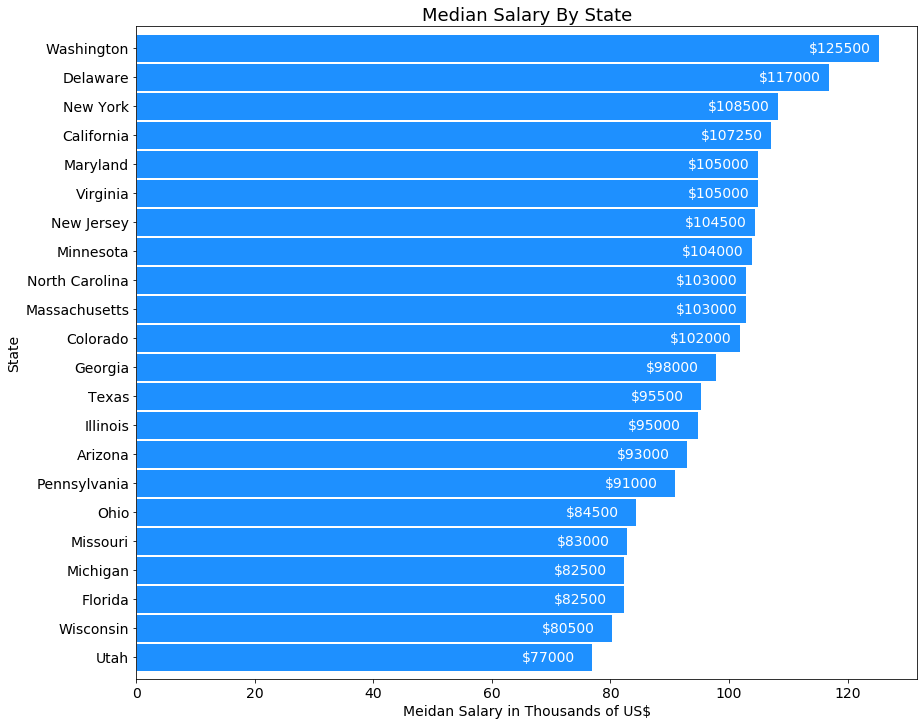

In [604]:
ax = salary_by_state["Median Salary"].sort_values(ascending=True).plot.barh(figsize=(14, 12), color='dodgerblue',
                                            edgecolor='white', linewidth=2, width = 1)

for i, v in enumerate(salary_by_state["Median Salary"].sort_values(ascending=True)):
    ax.text(v - 12, i, '$' + str(int(v*1000)), color='white', fontsize=14, ha='left', va='center')



plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


plt.xlabel('Meidan Salary in Thousands of US$', fontsize=14)
plt.ylabel('State', fontsize=14)

# set the font size of the title
plt.title('Median Salary By State', fontsize=18)

plt.savefig("salary_by_state.png",bbox_inches='tight')

# display the plot
plt.show()

## Degree Requirement Analysis

In [645]:
print(get_skill_count(["master's","masters"]) )
print("% of Jobs that mention a Master's Degree :" + str(round(get_skill_count(["master's","masters"]) *100 / df.shape[0],2))+'%')

405
% of Jobs that mention a Master's Degree :7.56%


In [646]:
print(get_skill_count(["bachelor's","bachelors"]))
print("% of Jobs that mention a Bachelor's Degree :" + str(round(get_skill_count(["bachelor's","bachelors"]) *100 / df.shape[0],2))+'%')

1437
% of Jobs that mention a Bachelor's Degree :26.81%


In [647]:
print(get_skill_count(["phd","ph.d"]))
print("% of Jobs that mention a PhD :" + str(round(get_skill_count(["phd","ph.d"]) *100 / df.shape[0],2))+'%')

130
% of Jobs that mention a PhD :2.43%


In [648]:
print(get_skill_count(["bachelor's","bachelors","master's","masters","phd","ph.d"]))
print("% of Jobs that mention a Degree:" + str(round(get_skill_count(["bachelor's","bachelors","master's","masters","phd","ph.d"]) *100 / df.shape[0],2))+'%')

1703
% of Jobs that mention a Degree:31.78%


In [649]:
print(df.shape[0] - 1703)
print("% of Jobs that don't mention a Degree :" + str(round((df.shape[0] - 1703) *100 / df.shape[0],2))+'%')

3656
% of Jobs that don't mention a Degree :68.22%


In [658]:
degree_df = pd.DataFrame({'Degree': ["No Degree","Bachelor's","Master's","PhD"],
                          'No. of Jobs':[3656,1437,405,130],
                         '% of Jobs':['68.22%','26.81%','7.56%','2.43%']})

In [659]:
degree_df

,Degree,No. of Jobs,% of Jobs
0,No Degree,3656,68.22%
1,Bachelor's,1437,26.81%
2,Master's,405,7.56%
3,PhD,130,2.43%
